# Pixel link Demo

In [1]:
import matplotlib.pyplot as plt
import pixellink
plt.rcParams['figure.figsize'] = (12, 8)

/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
util/plt.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/luoweimeng/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/luoweimeng/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", li

Instructions for updating:
Please switch to tf.train.get_or_create_global_step
(1280, 1280)
train/ic17_whole/model.ckpt-200000
INFO:tensorflow:Restoring parameters from train/ic17_whole/model.ckpt-200000
('train/ic17_whole/model.ckpt-200000', 'Restore Success!')


In [2]:
# 载入图片
pl = pixellink.pixelLinkDetector("/Users/luoweimeng/Code/data/复杂图片/3.jpg")

In [3]:
# 输出bounding boxes, (x1, y1, x2, y2, x3, y3, x4, y4) 顺时针方向
pl.detect()

0.7
0.8


[array([ 795,   92, 1692,   92,  795,  208, 1692,  208]),
 array([ 912,  248, 1588,  248,  912,  312, 1588,  312]),
 array([ 79, 365, 703, 365,  79, 416, 703, 416]),
 array([1003,  365, 1484,  365, 1003,  429, 1484,  429]),
 array([1928,  378, 2421,  378, 1928,  416, 2421,  416]),
 array([235, 456, 625, 456, 235, 507, 625, 507]),
 array([196, 534, 651, 534, 196, 572, 651, 572]),
 array([274, 612, 585, 612, 274, 651, 585, 651]),
 array([1875,  652, 2005,  652, 1875,  690, 2005,  690]),
 array([2006,  652, 2213,  652, 2006,  690, 2213,  690]),
 array([300, 743, 403, 743, 300, 781, 403, 781]),
 array([404, 743, 559, 743, 404, 781, 559, 781]),
 array([1094,  743, 1419,  743, 1094,  794, 1419,  794]),
 array([1836,  782, 2083,  782, 1836,  820, 2083,  820]),
 array([2110,  782, 2265,  782, 2110,  820, 2265,  820]),
 array([1081,  821, 1419,  821, 1081,  872, 1419,  872]),
 array([ 248,  990,  494,  990,  248, 1028,  494, 1028]),
 array([ 183, 1120,  377, 1120,  183, 1158,  377, 1158]),
 arr

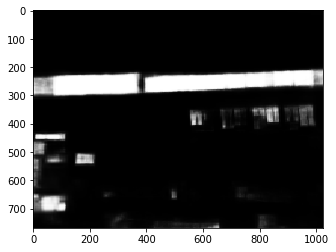

In [4]:
# 输出pixel score
pixel_score = pl.draw_pixel_score()
plt.imshow(pixel_score, cmap='gray')

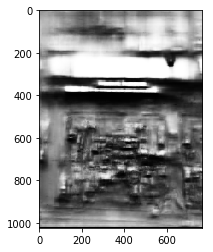

In [9]:
# 输出link score 0:左上 1:上 2:右上 3:左 4:右 5:左下 6:下 7:右下
link_score = pl.draw_link_score(6)
plt.imshow(link_score, cmap='gray')

In [4]:
import util
# 在原图上画出bounding boxes
image_data = pl.draw_bbox()

util.sit(image_data, format='bgr', path="samples/image7.png")

'samples/image7.png'

In [13]:
pl.draw_bbox().shape

(1024, 768, 3)

In [14]:
pl.draw_pixel_score().shape

(1024, 768)

In [1]:
import numpy as np

In [8]:
bbox = np.array([244, 490, 244, 427, 363, 427, 363, 490])

In [9]:
bbox = bbox.reshape(4, 2)

In [10]:
bbox

array([[244, 490],
       [244, 427],
       [363, 427],
       [363, 490]])

In [14]:
                upper_left = np.argmin(map(lambda x: x[0] + x[1], bbox))
                upper_right = (upper_left + 1) % 4
                down_left = (upper_left + 3) % 4
                down_right = (upper_left + 2) % 4

In [18]:
bbox[[upper_left, upper_right, down_left, down_right]].reshape(-1)

array([244, 427, 363, 427, 244, 490, 363, 490])

In [16]:
bbox

array([[244, 490],
       [244, 427],
       [363, 427],
       [363, 490]])